In [43]:
import numpy as np
from numpy.random import randint
import scipy
from scipy.special import factorial
import matplotlib
from matplotlib import pyplot as plt

In [44]:
%matplotlib notebook

In [45]:
number_of_flips = 100
bins = np.arange(0, number_of_flips)

In [46]:
number_of_coins = 1000000
results_of_all_flips = np.zeros((number_of_coins)) #this will store the result for each coin's set of flips

When we flip a coin, there will be some probability of being heads or tails. This probability will be described by the variable `probability_of_heads`. If that is set to 0.5, then it is like a normal, unbiased coin. 

In [47]:
probability_of_heads = 0.5
#loop through all coins we'll be using
for i in range(number_of_coins):
    #the function numpy.random.rand returns an array of numbers in the range [0,1)
    list_of_random_number_between_0_and_1 = np.random.rand(number_of_flips)
    
    #this list 'heads_or_tails' will be True (or 1) if heads. It will be False (0) if tails.
    heads_or_tails = list_of_random_number_between_0_and_1 < probability_of_heads
    
    #sum up the list. If all flips were heads, sum would be equal to the number of flips
    results_of_all_flips[i] = sum(heads_or_tails)

<IPython.core.display.Javascript object>


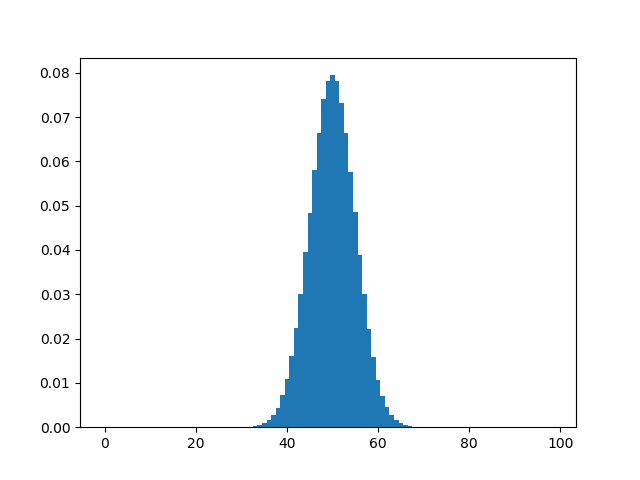

In [48]:
fig = plt.figure()
pdf, bins, patches = plt.hist(results_of_all_flips, bins, normed=1, rwidth=1, align='left')

Let's try to see if this agrees with the binomial distribution. 

Recall that:
$\mathcal{P}_{binom} = \frac{N!}{n_{heads}!(N-n_{heads})!} p^{n_{heads}}(1-p)^{N-n_{heads}}$

In [49]:
possible_n_heads = np.arange(0,number_of_flips)
number_of_states = factorial(number_of_flips) / (factorial(number_of_flips-possible_n_heads)*factorial(possible_n_heads))
binom_distribution = number_of_states * (probability_of_heads**possible_n_heads) * (1-probability_of_heads)**(number_of_flips-possible_n_heads)

<IPython.core.display.Javascript object>


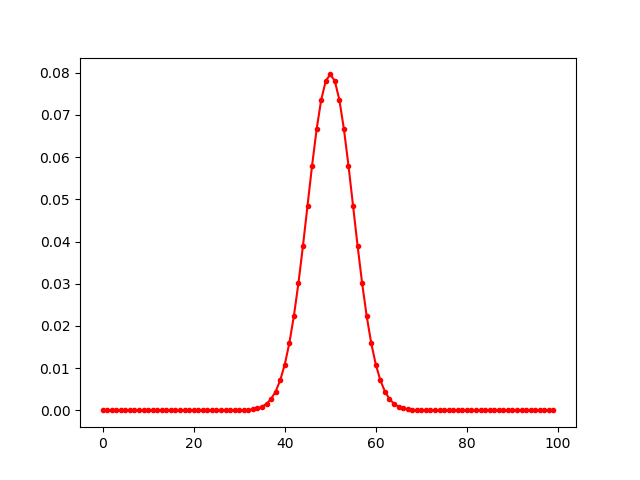

In [50]:
plt.figure()
plt.plot(possible_n_heads, binom_distribution, '-r.')

<IPython.core.display.Javascript object>


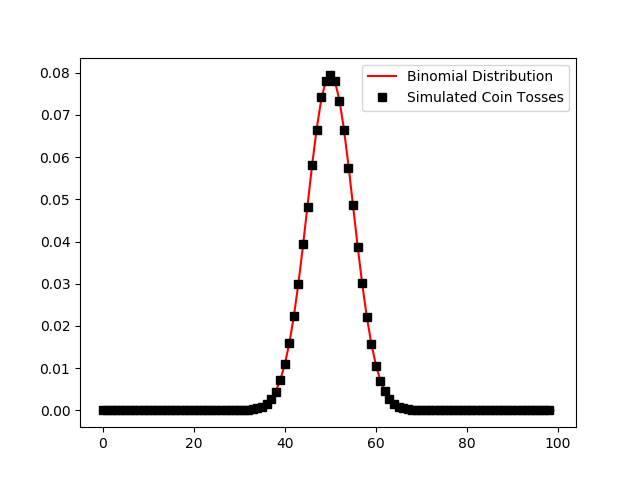

In [51]:
plt.figure()
plt.plot(possible_n_heads, binom_distribution, '-r', label="Binomial Distribution")
plt.plot(bins[:-1], pdf, 'ks', label="Simulated Coin Tosses")
plt.legend()

<IPython.core.display.Javascript object>


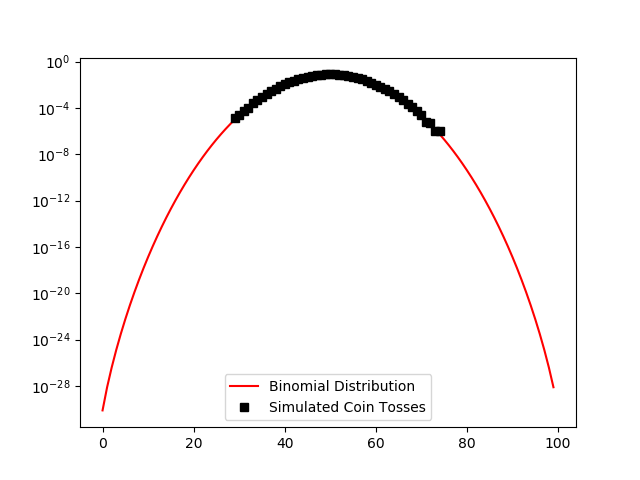

In [52]:
#Here we replot what was plotted above, but use a logarithmic scale for the y-axis
plt.figure()
plt.semilogy(possible_n_heads, binom_distribution, '-r', label="Binomial Distribution")
plt.plot(bins[:-1], pdf, 'ks', label="Simulated Coin Tosses")
plt.legend()

### Now let's compare to a Gaussian distribution.

Recall that the Gaussian distribution is given by:
$\mathcal{P}_{gauss} = \frac{1}{\sigma \sqrt{2 \pi}} e^{-(x-\mu_x)^2 / (2\sigma^2)} $
where $\mu_x$ is the mean of the distribution and $\sigma^2$ is the variance.

In [53]:
#Here, we find the mean and variance of a binomial distribution. 
#This was discussed in the second lecture
mean_value = number_of_flips * probability_of_heads #this is the expected value for a given set of coin tosses
variance = number_of_flips * probability_of_heads * (1-probability_of_heads) #the variance

In [54]:
normalization_factor = 1.0/(np.sqrt(2*np.pi*variance))
term_in_exponential = -1.0*(possible_n_heads - mean_value)**2/(2*variance)

In [55]:
gauss = normalization_factor * np.exp(term_in_exponential)

<IPython.core.display.Javascript object>


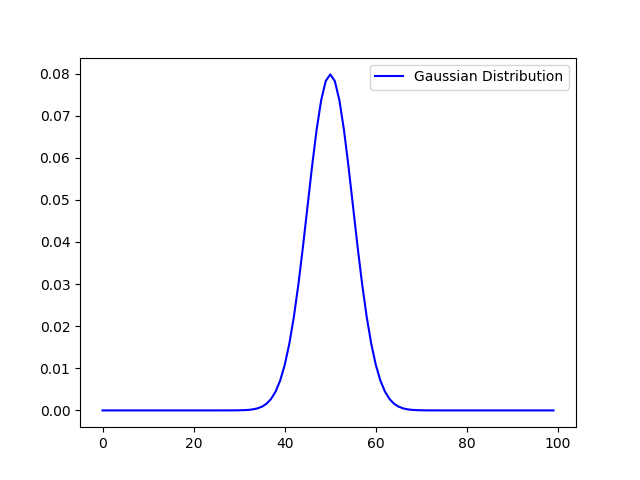

In [58]:
plt.figure()
plt.plot(possible_n_heads, gauss, '-b', label="Gaussian Distribution")
#plt.plot(possible_n_heads, binom_distribution, '-r', label="Binomial Distribution")
#plt.plot(bins[:-1], pdf, 'ks', label="Simulated Coin Tosses")
plt.legend()

<IPython.core.display.Javascript object>


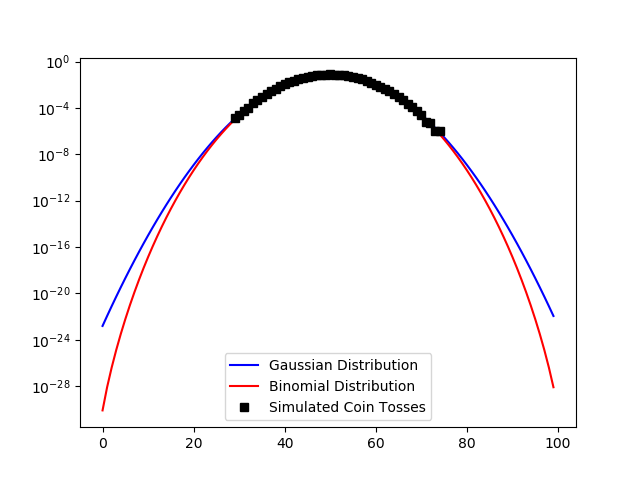

In [57]:
plt.figure()
plt.semilogy(possible_n_heads, gauss, '-b', label="Gaussian Distribution")
plt.plot(possible_n_heads, binom_distribution, '-r', label="Binomial Distribution")
plt.plot(bins[:-1], pdf, 'ks', label="Simulated Coin Tosses")
plt.legend()

### Now let's compare to a Poisson distribution.

The Poisson distribution is given by:
$\mathcal{P}_{poisson} = \frac{\mu^x e^{-\mu}}{x!} $

In [17]:
poisson = (mean_value**possible_n_heads)*np.exp(-1.0*mean_value)/(factorial(possible_n_heads))

<IPython.core.display.Javascript object>


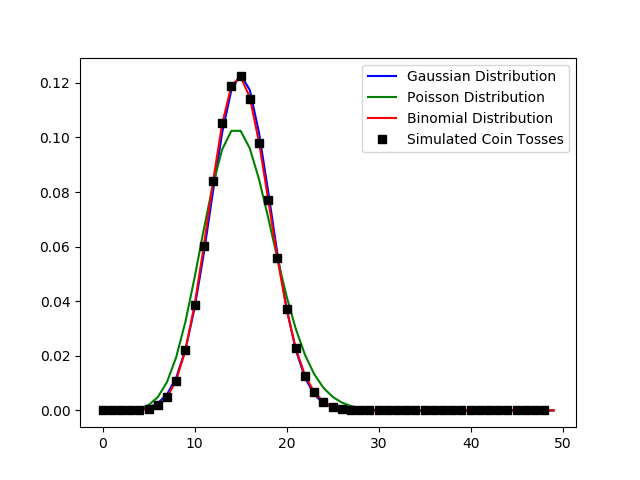

In [18]:
plt.figure()
plt.plot(possible_n_heads, gauss, '-b', label="Gaussian Distribution")
plt.plot(possible_n_heads, poisson, '-g', label="Poisson Distribution")
plt.plot(possible_n_heads, binom_distribution, '-r', label="Binomial Distribution")
plt.plot(bins[:-1], pdf, 'ks', label="Simulated Coin Tosses")
plt.legend()

<IPython.core.display.Javascript object>


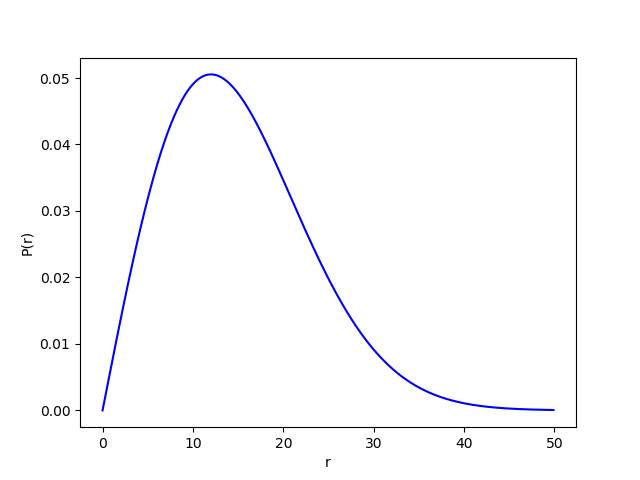

Text(0,0.5,'P(r)')

In [64]:
sigma = 12
r = np.arange(0,50,0.1)
a = 1./(2*np.pi*sigma*sigma)
p = a*np.exp(-1*r*r/(2*sigma*sigma))*2*np.pi*r

plt.figure()
plt.plot(r_vector, p, '-b')
plt.xlabel('r')
plt.ylabel('P(r)')